In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action="ignore")

In [54]:
df=pd.read_csv("House_Rent_Dataset.csv")

# Анализ входных данных

In [55]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [56]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Пропущенных значений нет


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [58]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [59]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

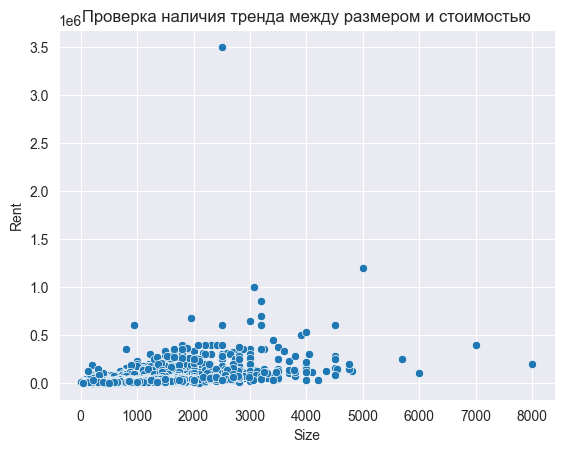

In [60]:
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title("Проверка наличия тренда между размером и стоимостью")
plt.show()

In [61]:
df_only_numeric=df[['BHK', 'Rent', 'Size', 'Bathroom']]

<Axes: >

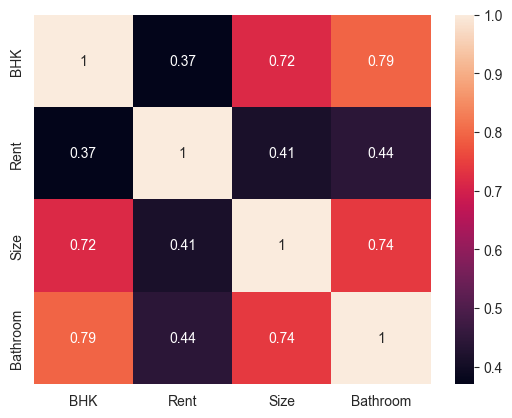

In [62]:
sns.heatmap(df_only_numeric.corr(), annot=True)

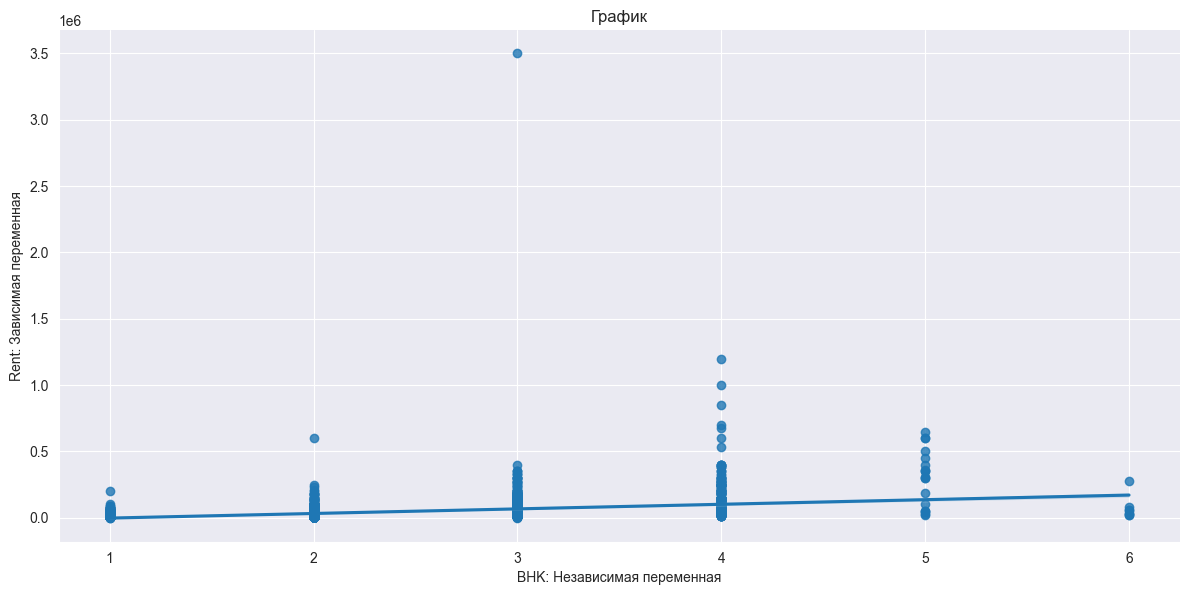

In [63]:
sns.lmplot(x='BHK',y='Rent',data=df,aspect=2,height=6)
plt.xlabel('BHK: Независимая переменная')
plt.ylabel('Rent: Зависимая переменная')
plt.title('График');

<Axes: xlabel='BHK', ylabel='Rent'>

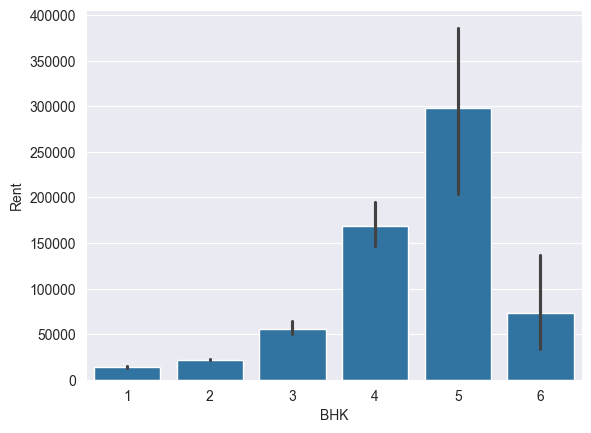

In [64]:
sns.barplot(x = df['BHK'], y = df['Rent'], data = df)

In [65]:
mean_rent=df.groupby('BHK')['Rent'].mean().sort_values()
print(mean_rent)

BHK
1     14139.223650
2     22113.864018
3     55863.062842
6     73125.000000
4    168864.555556
5    297500.000000
Name: Rent, dtype: float64


Аренда домов с 4/5 комнатами стоит дороже, чем с 6. На графике ниже видно, что это может быть связано с тем, что дома с 5-ю и 6-ю в среднем близки по размеру.

<Axes: xlabel='BHK', ylabel='Size'>

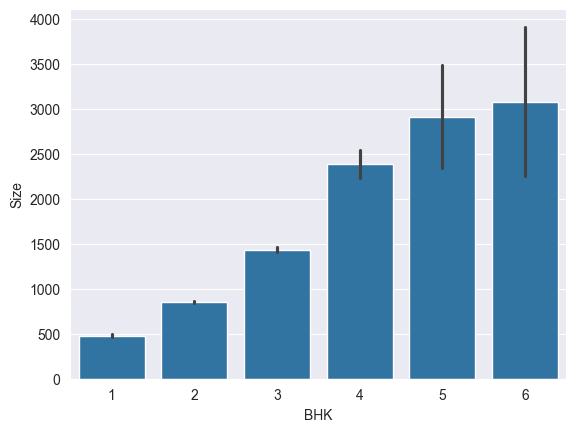

In [66]:
sns.barplot(x = df['BHK'], y = df['Size'], data = df)

In [67]:
mean_size=df.groupby('BHK')['Size'].mean().sort_values()
print(mean_size)

BHK
1     478.907455
2     852.072848
3    1432.367031
4    2382.190476
5    2910.947368
6    3075.000000
Name: Size, dtype: float64


<Axes: >

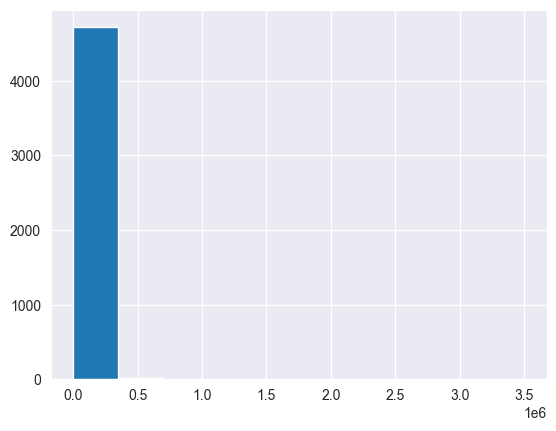

In [68]:
df['Rent'].hist()

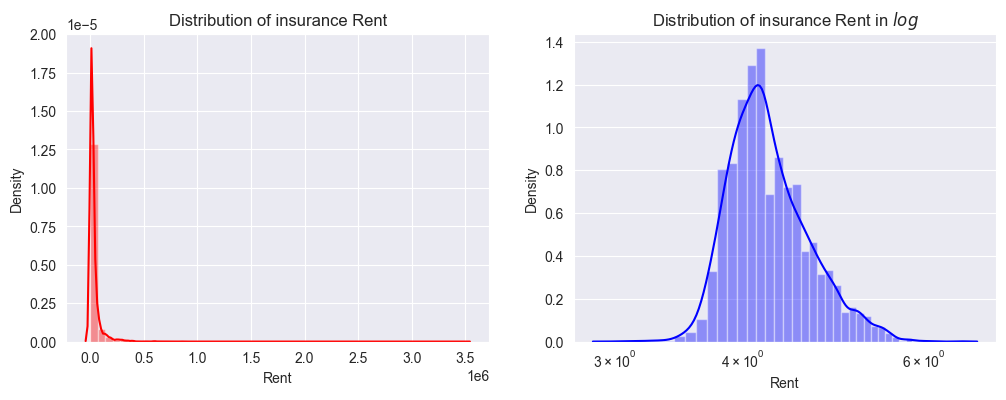

In [69]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Rent'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance Rent')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['Rent']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance Rent in $log$')
ax.set_xscale('log');

In [70]:
df['Rent'][df['Rent'] >= 150000].count()

199

Количество строк с арендой выше 150 тыс. крайне мало. Их можно отбросить для получения более наглядного графика.

<Axes: xlabel='Rent'>

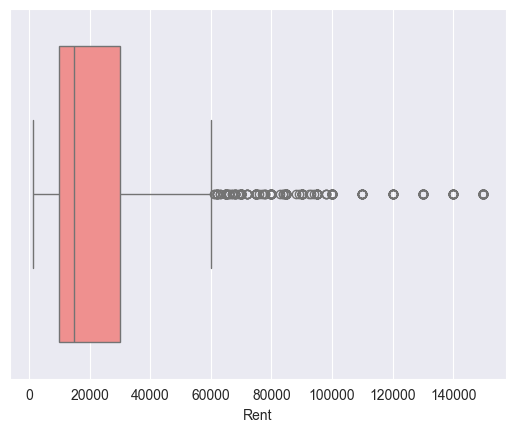

In [71]:
sns.boxplot(x = df['Rent'][df['Rent'] <= 150000], palette='spring')

Исходя из графика, можно наблюдать, что средняя стоимость жилья находится в диапазоне от 10 до 30 тыс.

Среднее значение арендной платы в группировке по городам:

In [72]:
meancities = df.groupby('City')['Rent'].mean().sort_values()
print(meancities)

City
Kolkata      11645.173664
Hyderabad    20555.048387
Chennai      21614.092031
Bangalore    24966.365688
Delhi        29461.983471
Mumbai       85321.204733
Name: Rent, dtype: float64


<Axes: xlabel='City'>

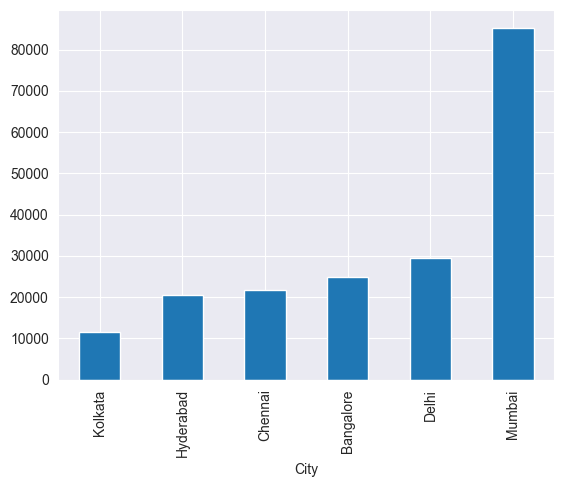

In [73]:
meancities.plot(kind="bar")

Можно наблюдать, что цены находятся в одном диапазоне примерно для всех городов, кроме Mumbai.

In [74]:
df['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [75]:
# Удаляем потому как эта фича нам ничего не даст
df.drop(["Area Locality"], axis="columns", inplace=True)

***Преобразование категориальных показателей к числовым.***

In [76]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Алгоритмы машинного обучения не работают с категориальными показателями, поэтому их необходимо преобразовать в числовые. 
Необходимо разбить столбец этажа на 2. 1 - этаж. 2 - всего этажей.

In [77]:
df["Floor"].describe()

count           4746
unique           480
top       1 out of 2
freq             379
Name: Floor, dtype: object

In [78]:
print(df["Floor"])

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object


In [79]:
df["Floor Number"] = df["Floor"].str.split().str[0]
df["Total Floor"] = df["Floor"].str.split().str[-1]

In [80]:
del df["Floor"]

In [81]:
df.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2022-05-18,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


В столбце Floor Number содержится строковое значение: Ground, Lower, Upper. Заменим их на числовые. 0, -1 и -2 соответственно

In [82]:
df["Floor Number"].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper', '11',
       'Lower', '6', '14', '43', '13', '18', '17', '9', '19', '60', '34',
       '12', '26', '25', '53', '16', '10', '39', '32', '47', '28', '20',
       '15', '65', '40', '37', '22', '21', '30', '35', '33', '44', '41',
       '46', '27', '45', '48', '50', '24', '23', '29', '49', '36', '76'],
      dtype=object)

In [83]:
df["Floor Number"] = df["Floor Number"].replace(['Upper'],-1)
df["Floor Number"] = df["Floor Number"].replace(['Lower'],-2)
df["Floor Number"] = df["Floor Number"].replace(['Ground'],0)
df["Total Floor"] = df["Total Floor"].replace('Ground', 0)

df["Floor Number"] = df["Floor Number"].astype("int64")
df["Total Floor"] = df["Total Floor"].astype("int64")

df["Floor Number"].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  8, -1, 11, -2,  6, 14, 43, 13, 18, 17,
        9, 19, 60, 34, 12, 26, 25, 53, 16, 10, 39, 32, 47, 28, 20, 15, 65,
       40, 37, 22, 21, 30, 35, 33, 44, 41, 46, 27, 45, 48, 50, 24, 23, 29,
       49, 36, 76], dtype=int64)

In [84]:
df["Total Floor"].unique()

array([ 2,  3,  1,  4,  5, 14,  8,  6, 19, 10,  7, 13, 78, 18, 12, 24, 31,
       21, 23, 20,  9, 22, 58, 16, 66, 48, 40, 44, 42, 41, 60, 32, 30, 29,
       89, 15, 11, 28, 17, 45, 35, 75, 38, 51, 43, 25, 27, 26, 76, 36, 37,
       55, 68, 77, 50, 59, 62, 39, 52, 54, 33, 46, 85, 71, 81, 34,  0],
      dtype=int64)

Видим, что данные преобразованы в числовой вид.

Далее необходимо преобразовать Area Type в числовой вид.

In [85]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

<Axes: xlabel='Area Type'>

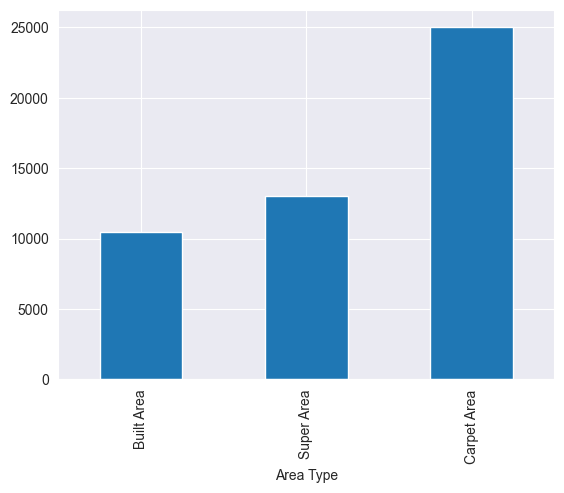

In [86]:
df.groupby('Area Type')['Rent'].median().sort_values().plot(kind='bar')

Area Type принимает 3 возможных значения. Преобразовываем их к числовым показателям. То же самое делаем с Furnishing Status, Tenant Preferred, Point of Contact и City.

In [87]:
def encode_categorical_column(df, column_name):
    label_encoder = preprocessing.LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name])
    unique_values = df[column_name].unique()
    return unique_values

encode_categorical_column(df, "Area Type")
encode_categorical_column(df, "Furnishing Status")
encode_categorical_column(df, "Tenant Preferred")
encode_categorical_column(df, "Point of Contact")
encode_categorical_column(df, "City")

array([4, 5, 0, 2, 1, 3])

In [88]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['Month'] = df['Posted On'].dt.month
del df['Posted On']

In [89]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor,Month
0,2,10000,1100,2,4,2,1,2,2,0,2,5
1,2,20000,800,2,4,1,1,1,2,1,3,5
2,2,17000,1000,2,4,1,1,1,2,1,3,5
3,2,10000,800,2,4,2,1,1,2,1,2,7
4,2,7500,850,1,4,2,0,1,2,1,2,5


<Axes: >

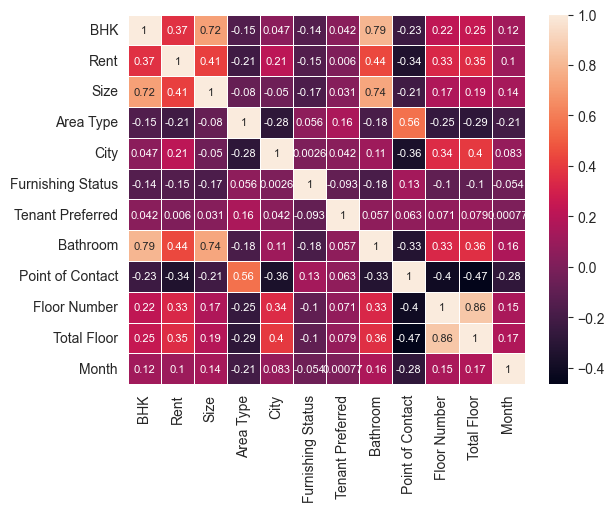

In [90]:
sns.heatmap(df.corr(), linewidths=.5, annot_kws={"size": 8}, annot=True)

# Без регуляризации

In [91]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df['Rent'],alpha=0.05)

df['Rent'] = y_bc
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor,Month
0,2,2.790248,1100,2,4,2,1,2,2,0,2,5
1,2,2.816393,800,2,4,1,1,1,2,1,3,5
2,2,2.810809,1000,2,4,1,1,1,2,1,3,5
3,2,2.790248,800,2,4,2,1,1,2,1,2,7
4,2,2.777433,850,1,4,2,0,1,2,1,2,5


In [92]:
ci,lam

((-0.3703365525558529, -0.316207485899602), -0.343201216144804)

In [93]:
from sklearn.model_selection import train_test_split
X = df.drop('Rent',axis=1)
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [94]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [95]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [96]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,2.797810,2.797810
1,theta_1,BHK,0.005233,0.005233
2,theta_2,Size,0.000006,0.000006
3,theta_3,Area Type,-0.002721,-0.002721
4,theta_4,City,0.001759,0.001759
5,theta_5,Furnishing Status,-0.006780,-0.006780
6,theta_6,Tenant Preferred,-0.000930,-0.000930
7,theta_7,Bathroom,0.008494,0.008494
8,theta_8,Point of Contact,-0.009303,-0.009303
9,theta_9,Floor Number,0.000067,0.000067


In [97]:
y_pred_norm =  np.matmul(X_test_0,theta)
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.0002838370674764209
R square obtain for normal equation method is : 0.6680143661461049


# с L2 регуляризацией

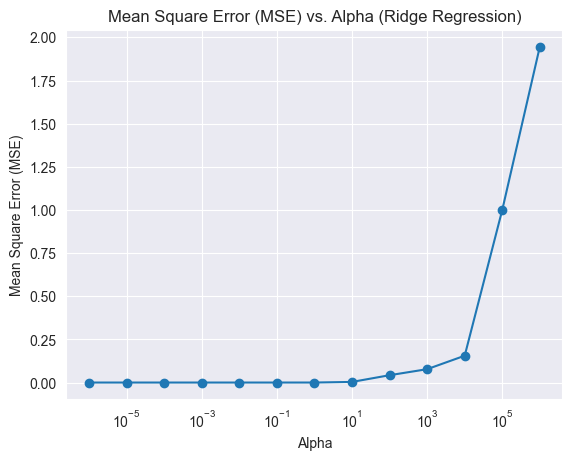

Best Alpha: 0.1
Parameters using Ridge Regression with Pseudo Inverse and Best Alpha: [ 2.79036562e+00  5.49985147e-03  5.85561439e-06 -2.02436729e-03
  1.87128269e-03 -6.51547957e-03 -7.71485011e-04  8.60141212e-03
 -9.07426727e-03  6.64968518e-05  4.40619212e-04  4.40030947e-04]


In [98]:
from sklearn.metrics import mean_squared_error

def ridge_regression_pseudo_inverse(X, y, alpha):
    m, n = X.shape
    pseudo_inverse = np.linalg.pinv(X.T @ X + alpha * np.eye(n))
    theta = pseudo_inverse @ X.T @ y
    return theta

X_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
alphas = np.logspace(-6, 6, 13)

mse_values = []

for alpha in alphas:
    theta_ridge = ridge_regression_pseudo_inverse(X_with_bias, y_train.values, alpha)
    
    y_pred_ridge = X_test @ theta_ridge[1:] + theta_ridge[0]
    
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_values.append(mse_ridge) 
    
plt.plot(alphas, mse_values, marker='o')
plt.xscale('log') 
plt.title('Mean Square Error (MSE) vs. Alpha (Ridge Regression)')
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error (MSE)')
plt.show()

best_alpha = alphas[np.argmin(mse_values)]
print('Best Alpha:', best_alpha)

theta_ridge_best = ridge_regression_pseudo_inverse(X_with_bias, y_train.values, best_alpha)

print('Parameters using Ridge Regression with Pseudo Inverse and Best Alpha:', theta_ridge_best)

In [99]:
y_pred_norm =  np.matmul(X_test_0,theta_ridge_best)
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.00028302585292496065
R square obtain for normal equation method is : 0.6689631906934146


# Градиентный спуск

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

In [101]:
theta = np.random.randn(X_train_with_bias.shape[1], 1)
X_test_with_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
learning_rate = 0.1
num_iterations = 2500

mse_values = [] 
for iteration in range(num_iterations):
    gradients = 2/X_train_with_bias.shape[0] * X_train_with_bias.T.dot(X_train_with_bias.dot(theta) - y_train.values.reshape(-1, 1))
    theta = theta - learning_rate * gradients
    y_pred = X_test_with_bias.dot(theta)
    mse = np.mean((y_pred - y_test.values.reshape(-1, 1))**2)
    mse_values.append(mse) 

print('Intercept:', theta[0, 0])
print('Coefficients:', theta[1:])

y_pred = X_test_with_bias.dot(theta)

Intercept: 2.81096086787613
Coefficients: [[ 0.00441524]
 [ 0.00391165]
 [-0.00136165]
 [ 0.00315839]
 [-0.00462314]
 [-0.00047789]
 [ 0.00755627]
 [-0.00869375]
 [ 0.00039014]
 [ 0.00421486]
 [-0.00029752]]


In [102]:
mse = np.mean((y_pred - y_test.values.reshape(-1, 1))**2)
print('Mean Square Error (MSE):', mse)

sst = np.sum((y_test.values.reshape(-1, 1) - np.mean(y_test.values.reshape(-1, 1)))**2)
r_square = 1 - (np.sum((y_pred - y_test.values.reshape(-1, 1))**2) / sst)
print('R square:', r_square)

Mean Square Error (MSE): 0.0002838370674764222
R square: 0.6680143661461033


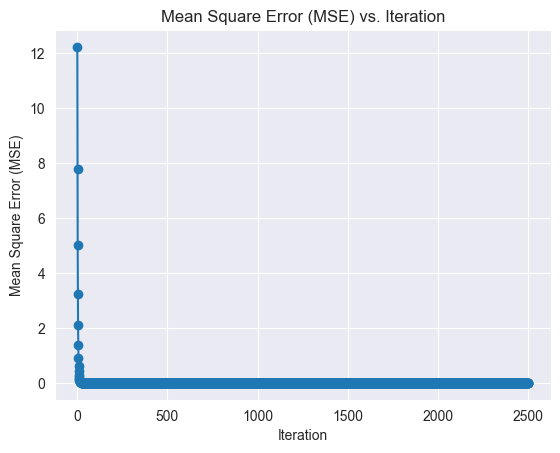

In [103]:
plt.plot(range(1, num_iterations + 1), mse_values, marker='o')
plt.title('Mean Square Error (MSE) vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Mean Square Error (MSE)')
plt.show()

In [104]:
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': lin_reg.coef_})
coefficients['absolute_coefficient'] = np.abs(coefficients['coefficient'])

sorted_coefficients = coefficients.sort_values(by='absolute_coefficient', ascending=False)
print(sorted_coefficients)

              feature  coefficient  absolute_coefficient
7    Point of Contact    -0.009303              0.009303
6            Bathroom     0.008494              0.008494
4   Furnishing Status    -0.006780              0.006780
0                 BHK     0.005233              0.005233
2           Area Type    -0.002721              0.002721
3                City     0.001759              0.001759
5    Tenant Preferred    -0.000930              0.000930
9         Total Floor     0.000439              0.000439
10              Month    -0.000357              0.000357
8        Floor Number     0.000067              0.000067
1                Size     0.000006              0.000006


# Контрольные вопросы

1. Какие признаки оказывают наибольший вклад в точность определения стоимости аренды? Предложить способы отбора наиболее важных признаков
Ответ: Наибольший вклад оказывают Point of Contact, Bathroom, Furnishing Status и BHK. 
Способы отбора: 
Отбор на основе корреляции. Изучение корреляции между признаками и целевой переменной. Удаление признаков, которые слабо коррелируют с целевой переменной. 
Отбор на основе важности признаков. Использование алгоритмов, которые предоставляют информацию о важности признаков, например, RandomForestRegressor с функцией

2. Какая модель имеет наименьшее значение функции потерь на тестовой выборке? Помогает ли регуляризация избежать эффекта переобучения в данном примере?
Наименьшее значение функции потерь имеет модель с L2 регуляризацией. В данном примере регуляризация помогла, так как mse в модели с регуляризацией меньше, а также R^2 больше

